### ロジット関数

オッズ比の対数（対数オッズ）

$$ logit(p) = log\frac{p}{(1-p)} $$

この関数を使って、特徴量の値と対数オッズの間の線形関係を表すことができる

$$ logit(p(y=1|x) = w_0x_0 +  w_1x_1 + ... +  w_mx_m = \sum_{i=0}^mw_ix_i = w^Tx  $$

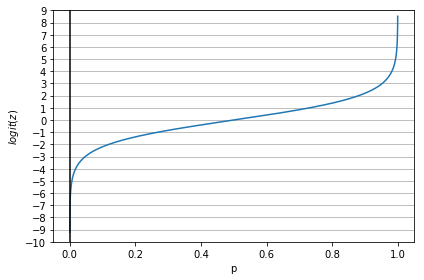

In [17]:
import matplotlib.pyplot as plt
import numpy as np


def logit(p):
    ones = np.ones(p.size)
    return np.log(p / (ones - p))

z = np.arange(0.0001, 0.9999, 0.0001)
phi_z = logit(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-7, 7)
plt.xlabel('p')
plt.ylabel('$logit(z)$')

# y axis ticks and gridline
plt.yticks(range(-10, 10, 1))
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

### シグモイド関数

ロジット関数の逆関数。

$$ \phi(z) = \frac{1}{1+e^(-z)} $$

ステップ関数とは異なり緩やかに上昇していくため、例えば結果が降水確率が0.8なら80%であるということができる。

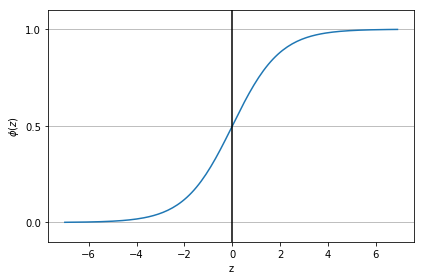

In [16]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

### ロジスティック回帰の重みの学習

尤度L：結果から見たところの条件のもっともらしさ

$$ L(w) = P(y|x;w) = \prod_{i=1}^nP(y^{(i)}|x^{(i)};w) = \prod_{i=1}^n(\phi(z^{(i)}))^{(y^{(i)})}(1-\phi(z^{(i)}))^{1-y^{(i)}} $$

\\( P(y|x;w) \\)の;wはwをパラメータに持つという意味。

対数尤度l：
* アンダーフローの可能性低下
* 積が和に変換されるため加算を用いて微分できるようになる

$$ l(w) = logL(w) = \sum_{i=1}^n\bigl[(y^{(i)}log(\phi(z^{(i)})))+({1-y^{(i)})log(1-\phi(z^{(i)}))}\bigr] $$

上記関数は勾配上昇するので、コスト関数Jとしてはマイナスにする

$$ J(w) = \sum_{i=1}^n\bigl[(-y^{(i)}log(\phi(z^{(i)})))-({1-y^{(i)})log(1-\phi(z^{(i)}))}\bigr] $$

1つのサンプルで計算されるコストは、上式から\\( \sum \\)と\\( (i) \\)を取って、

$$ J(\phi(z),y;w) = -ylog(\phi(z))-(1-y)log(1-\phi(z)) $$

上式から、y=0であれば1つ目の項が0になりy=1であれば2つ目の項が0になる。

$$ J(\phi(z),y;w) = \begin{cases}
-log(\phi(z)) & \text (y=1)\\
-log(1-\phi(z))   & \text (y=0)\end{cases}$$
